In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [95]:
df = pd.read_csv('../../dataset/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [96]:
df.drop(['id'], axis=1, inplace=True)

### Convert Categorical Features

In [97]:
df.loc[df['Gender'] == 'Male', 'Gender'] = 1
df.loc[df['Gender'] == 'Female', 'Gender'] = 0

df.loc[df['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
df.loc[df['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
df.loc[df['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

df.loc[df['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
df.loc[df['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

df.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1


Pertama kita akan melakukan pengecekan korelasi masing-masing feature

<Axes: >

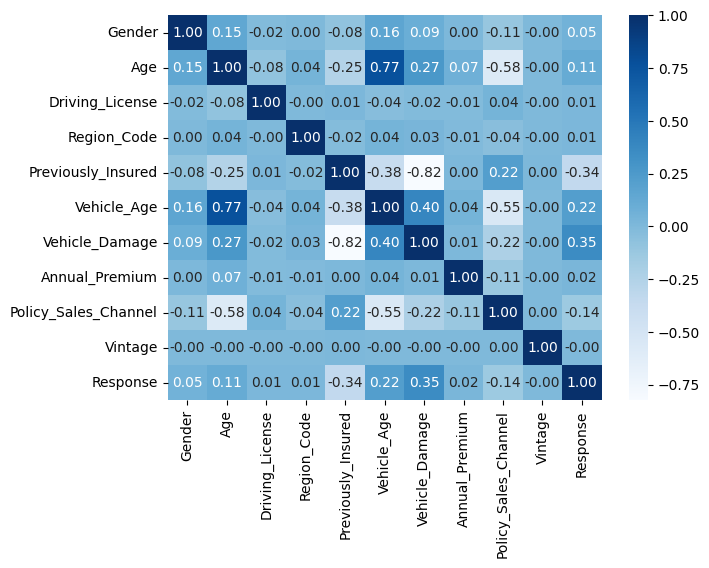

In [98]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dapat dilihat bahwa terdapat beberapa fitur yang tidak memiliki korelasi yang tinggi dengan korelasi dibawah 10% yaitu:

- Gender
- Driving_License
- Region_Code
- Annual_Premium
- Vintage  

## Feature Extraction

### Annual Premium Bin

In [105]:
# Binning the 'Annual_Premium' column
df['Annual_Premium_Binned'], bin_edges = pd.cut(df['Annual_Premium'], bins=3, labels=False, retbins=True)
print("Bin Edges:", bin_edges)

Bin Edges: [  2092.465      181808.33333333 360986.66666667 540165.        ]


### Premium To Age Ratio

In [112]:
df['Premium_to_Age_Ratio'] = df['Annual_Premium'] / df['Age']

<Axes: >

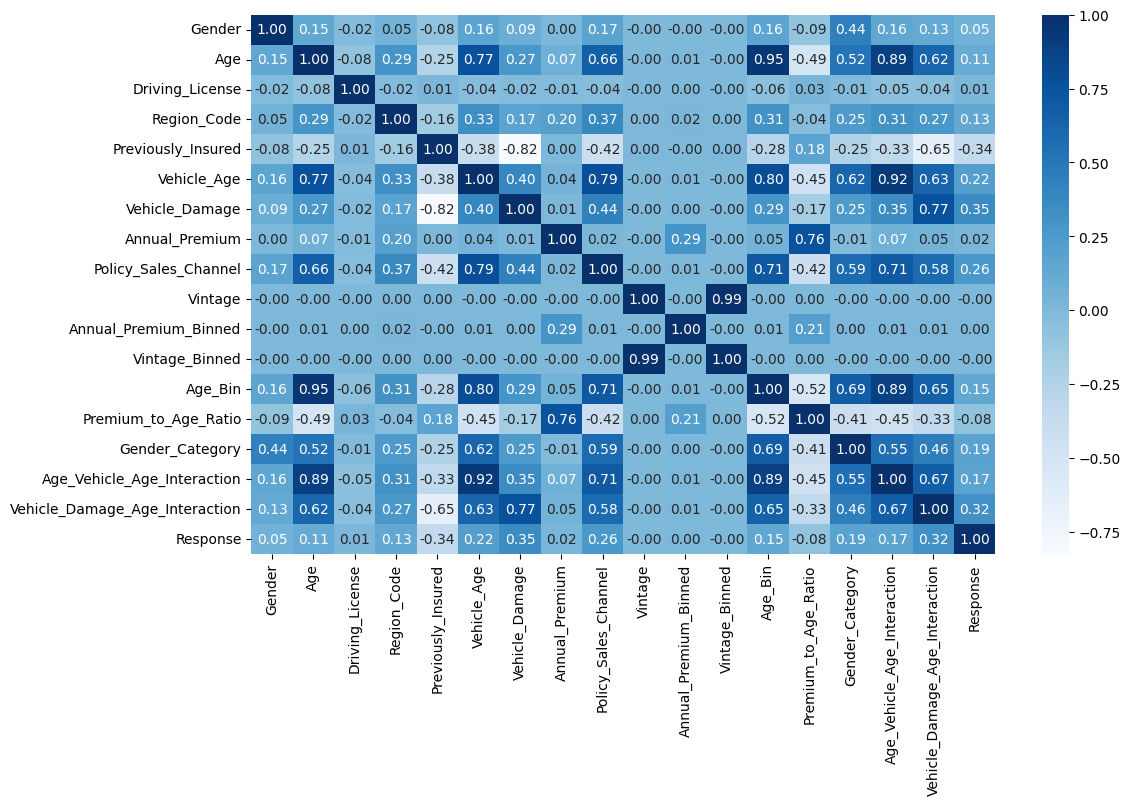

In [126]:
df['Response'] = df.pop('Response')
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [123]:
# df.to_csv('../../dataset/train_preprocessed_1.csv')

In [124]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Annual_Premium_Binned,Vintage_Binned,Age_Bin,Premium_to_Age_Ratio,Gender_Category,Age_Vehicle_Age_Interaction,Vehicle_Damage_Age_Interaction,Response
0,1,44,1,52,0,2,1,40454.0,126,217,0,4,3,919.409091,7,6,3,1
1,1,76,1,44,0,1,0,33536.0,126,183,0,3,4,441.263158,4,4,0,0
2,1,47,1,52,0,2,1,38294.0,126,27,0,0,3,814.765957,8,6,3,1
3,1,21,1,35,1,0,0,28619.0,38,203,0,3,0,1362.809524,2,0,0,0
4,0,29,1,39,1,0,0,27496.0,38,39,0,0,1,948.137931,5,0,0,0
